In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid_df = pd.read_csv("./data/covid_19_data.csv")

In [3]:
covid_df.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [4]:
df = covid_df

In [5]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [6]:
df.drop(columns = 'Last Update',inplace = True)

In [7]:
df.isna().sum()

SNo                    0
ObservationDate        0
Province/State     26449
Country/Region         0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [21]:
#Active Cases
df['Active'] = df.Confirmed - df.Deaths - df.Recovered

In [22]:
by_months_df = df.groupby(df['ObservationDate'].dt.month)[['Confirmed','Deaths','Recovered','Active']].agg('sum')
by_months_df

,Confirmed,Deaths,Recovered,Active
ObservationDate,,,,
1,38535.0,889.0,844.0,36802.0
2,1671959.0,46898.0,380794.0,1244267.0
3,8894726.0,386173.0,2707659.0,5800894.0
4,63402405.0,4176098.0,16414806.0,42811501.0
5,144769885.0,9568332.0,54214094.0,80987459.0
6,246575254.0,13285446.0,118668091.0,114621717.0
7,431478983.0,18390569.0,242129048.0,170959366.0
8,17849853.0,685054.0,10553585.0,6611214.0


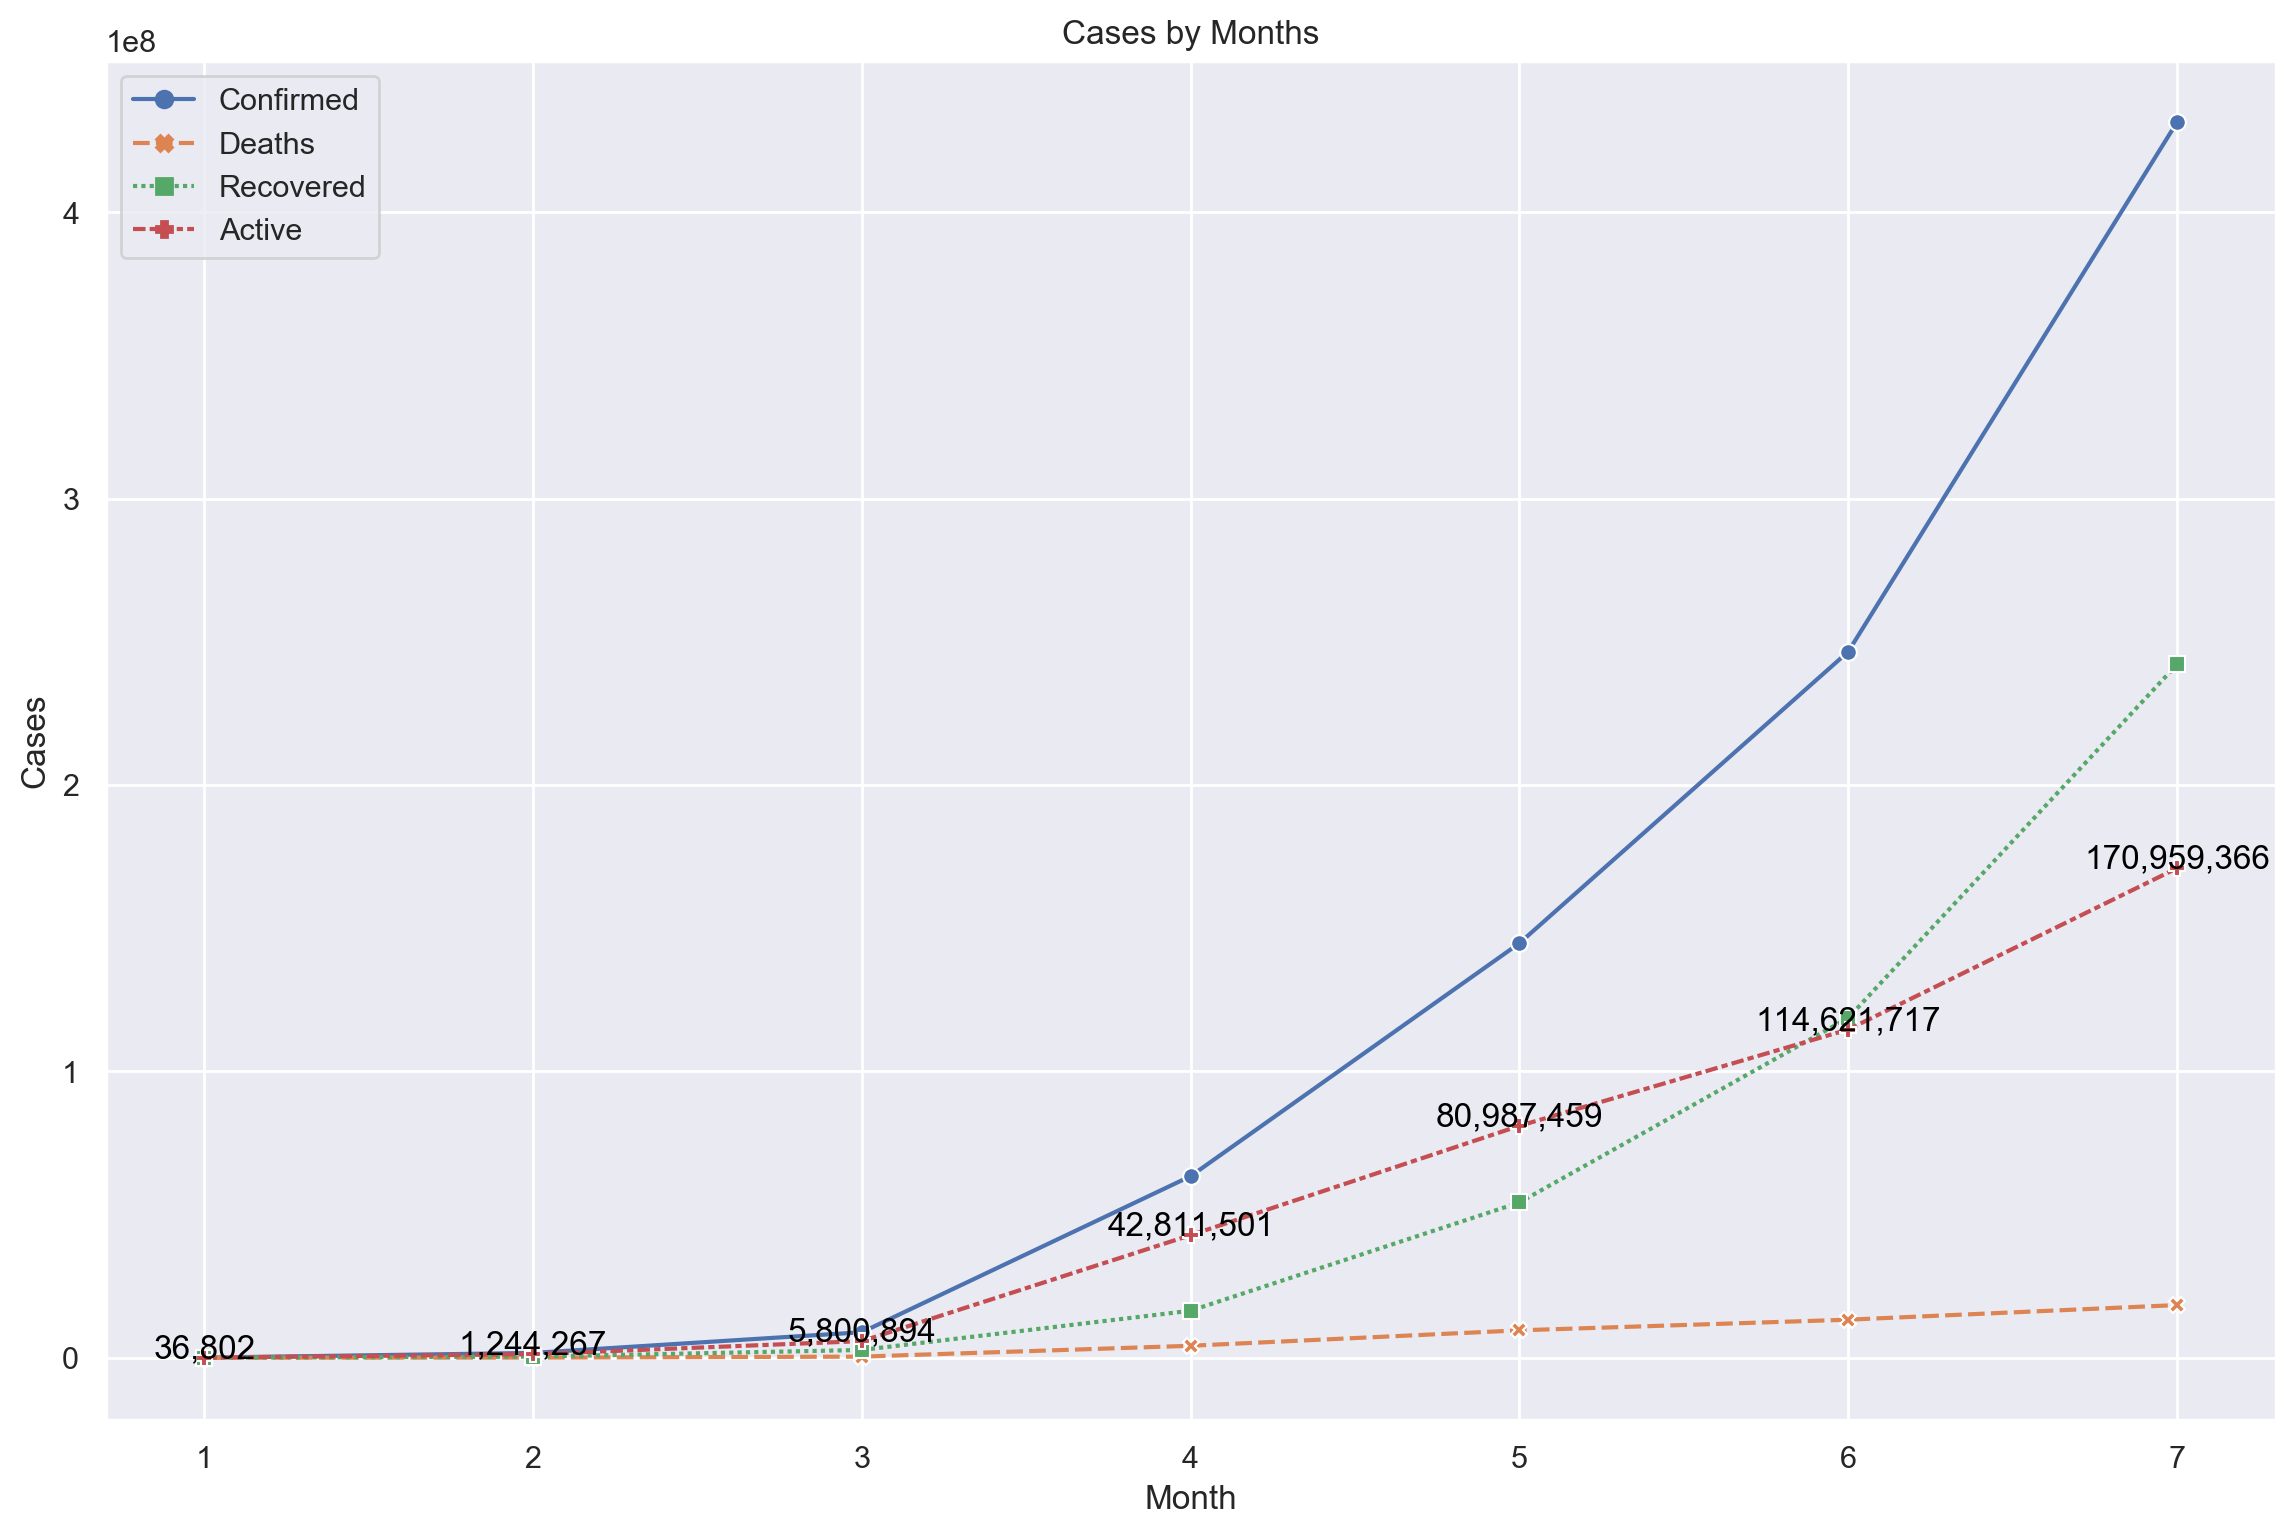

In [84]:
plt.figure(figsize = (14,9),dpi = 200)
sns.set(style="darkgrid")
ax = sns.lineplot(hue="class", style="logic", markers=True,data = by_months_df.iloc[0:-1])
ax.set_title('Cases by Months')
ax.set_xlabel('Month')
ax.set_ylabel('Cases')
for index, row in by_months_df.iloc[0:-1].iterrows():
    ax.text(row.name, row.Active,f"{int(row.Active):,}",color='black', ha="center")

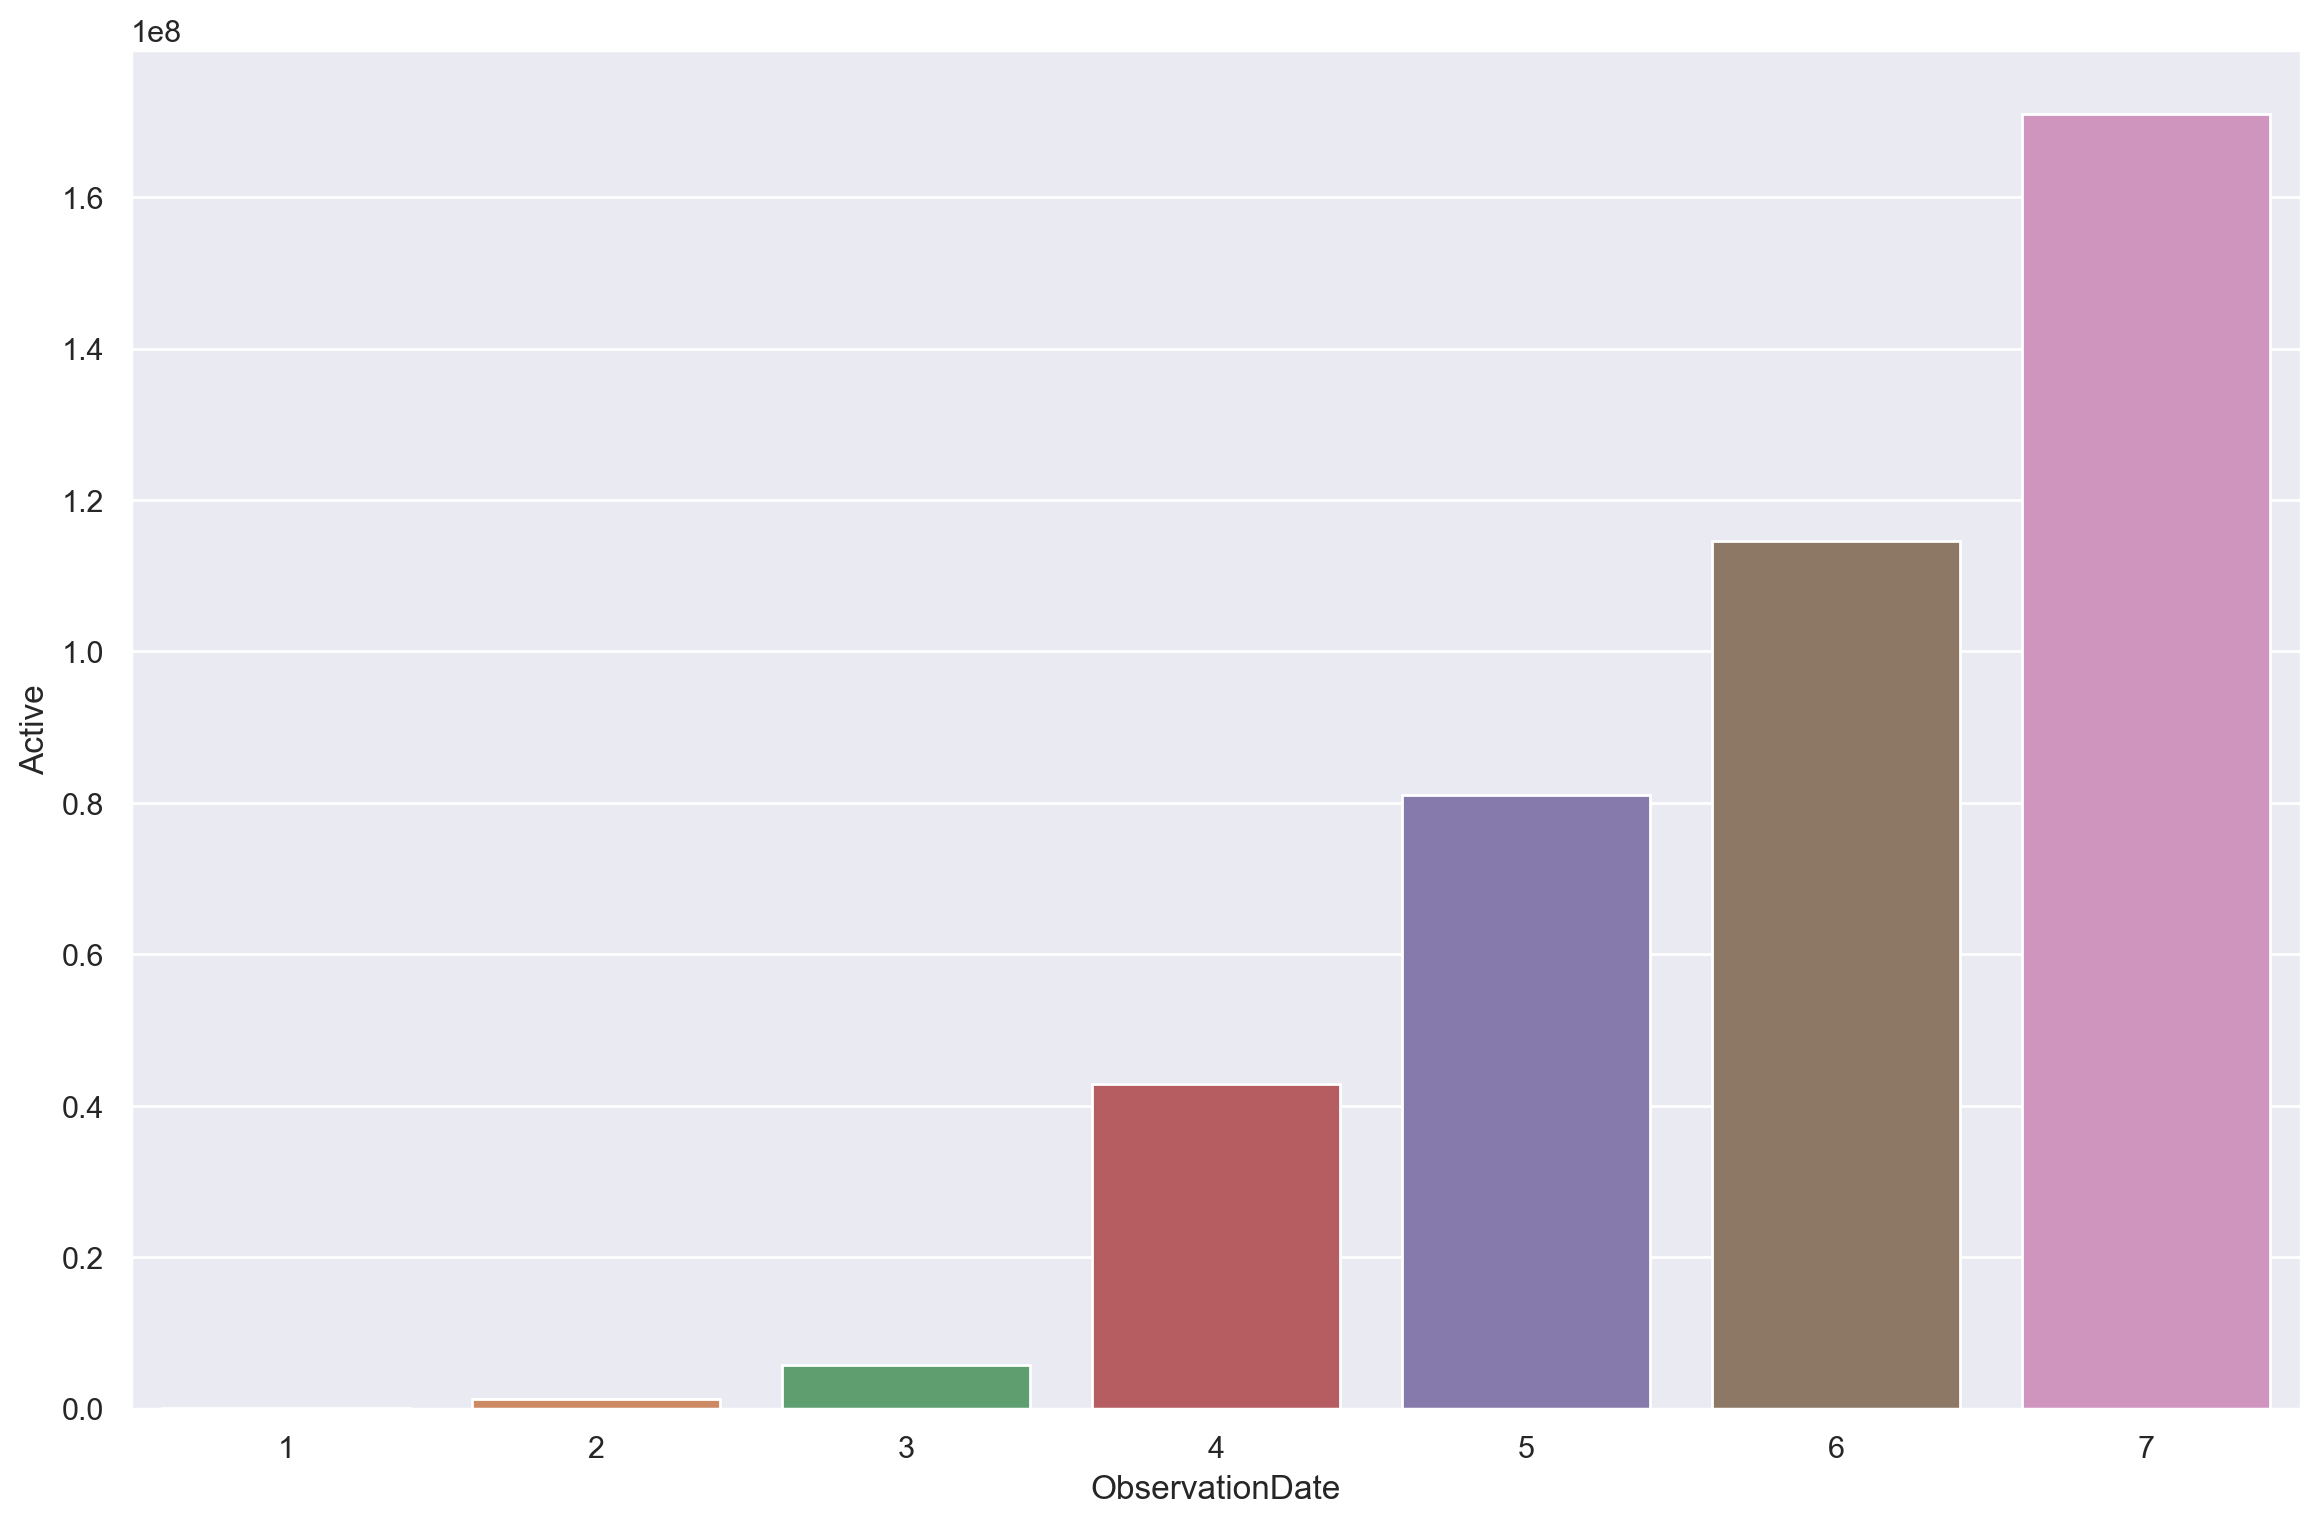

In [88]:
plt.figure(figsize = (14,9),dpi = 200)
sns.barplot(x= by_months_df.index[0:-1], y= 'Active', data=by_months_df.iloc[0:-1])